# Is seasonality a good predictor of implied volatility?

First, we need to define seasonality. We're going to create a "seasonality" parameter using a sine wave, mapping it's peak to June 30th and it's trough to January 1st.

In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import timeit

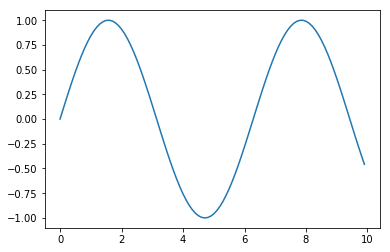

In [2]:
#plot basic sine wave
x = np.arange(0,10,.1)
y = np.sin(x)
plt.plot(x,y)
plt.show()

In [3]:
# double check function for max/min amplitude
print(np.sin(np.pi/2))
print(np.sin(-np.pi/2))

1.0
-1.0


In [4]:
# play with dates
sample_date = dt.date(2019,5,29)
sample_date2 = dt.date(2019,6,17)
print(sample_date)
year = sample_date.year
print(year)
print(dt.date(year,6,30))
x = (sample_date - sample_date2).days
print(abs(x))

2019-05-29
2019
2019-06-30
19


In [60]:
# define seasonality function we will be using
def date_season(date):
    year = date.year
    min_season = pd.datetime(year,1,1)
    max_season = pd.datetime(year,7,2)
    dif = abs(max_season - date)
    dif_days = dif.days
    x = (((max_season - min_season).days) - dif.days * 2) / (max_season - min_season).days
    seasonality = np.sin(x * (np.pi) / 2)
    return(seasonality)

In [64]:
start = dt.date(2017,1,1)
end = dt.date(2019,12,31)
df1 = pd.DataFrame({'Date': pd.date_range(start, end, freq="D")})
df1.head(20)

,Date
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
5,2017-01-06
6,2017-01-07
7,2017-01-08
8,2017-01-09
9,2017-01-10


In [65]:
df1['Seasonality'] = df1.applymap(lambda x: date_season(x))

In [67]:
df1.head(370)

,Date,Seasonality
0,2017-01-01,-1.000000
1,2017-01-02,-0.999851
2,2017-01-03,-0.999404
3,2017-01-04,-0.998659
4,2017-01-05,-0.997617
5,2017-01-06,-0.996278
6,2017-01-07,-0.994642
7,2017-01-08,-0.992709
8,2017-01-09,-0.990480
9,2017-01-10,-0.987957


In [6]:
# alternate seasonality function with python datetime type
# rework with negative cosine instead of sine
# x should be number of days from beg of year * 2pi /  number of days in year
# seasonality = -np.cox(x)

def date_season2(date):
    year = date.year
    min_season = dt.date(year,1,1)
    max_season = dt.date(year,6,30)
    dif = abs(max_season - date)
    dif_days = dif.days
    x = (((max_season - min_season).days) - dif.days * 2) / (max_season - min_season).days
    seasonality = np.sin(x * (np.pi) / 2)
    return(seasonality)

In [7]:
# testing datetime functionality
#def date_season2(date):
date = dt.date(2019,3,15)
print(type(date))
year = date.year
print(type(year))
min_season = dt.date(year,1,1)
max_season = dt.date(year,6,30)
print(type(min_season))
print(type(max_season))
dif = abs(max_season - date)
print(type(dif))
dif_days = dif.days
print(type(dif_days))
x = (((max_season - min_season).days) - dif.days * 2) / (max_season - min_season).days
seasonality = np.sin(x * (np.pi) / 2)
print(seasonality)

<class 'datetime.date'>
<class 'int'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.timedelta'>
<class 'int'>
-0.2923717047227367


In [68]:
print(date_season(pd.datetime(2019,3,15)))
print(date_season(pd.datetime(2020,3,15)))
print(date_season(pd.datetime(2021,3,15)))

-0.30573182735975285
-0.2959267013472894
-0.30573182735975285


Now we need to map to calendar

In [9]:
# create pandas dataframe with a range of dates
start = dt.date(2017,1,1)
end = dt.date(2019,12,31)
df = pd.DataFrame({'Date': pd.date_range(start, end, freq="D")})

In [10]:
df.head(20)

,Date
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
5,2017-01-06
6,2017-01-07
7,2017-01-08
8,2017-01-09
9,2017-01-10


In [11]:
# map seasonality parameter to the range of dates
# works because there is only one column in the df we previously created, 
# will throw an error if run twice
df['Seasonality'] = df.applymap(lambda x: date_season(x))

In [12]:
df.head(200)

,Date,Seasonality
0,2017-01-01,-1.000000
1,2017-01-02,-0.999848
2,2017-01-03,-0.999391
3,2017-01-04,-0.998630
4,2017-01-05,-0.997564
5,2017-01-06,-0.996195
6,2017-01-07,-0.994522
7,2017-01-08,-0.992546
8,2017-01-09,-0.990268
9,2017-01-10,-0.987688


In [13]:
print(df.iloc[9])

Date           2017-01-10 00:00:00
Seasonality              -0.987688
Name: 9, dtype: object


In [14]:
# error due to function not able to operate on a series
# df['Seasonality'] = date_season(df.Date)

AttributeError: 'Series' object has no attribute 'year'

In [15]:
print(len(df))

1095


In [ ]:
# alternate way to create a list of seasonalities and then combine with original df, not efficient
z = []
for index, row in df.iterrows():
    z.append(date_season(row.Date))
print(z)

### In the section below, we aggregate implied volatility data into a data frame.

In [77]:
# read in csv file with SF vol data
SN = pd.read_csv('C:/Users/Trader/Desktop/Dropbox/Data Science/DataSets/ImpVol/SNvol.csv', index_col=False)

In [78]:
SN.head(20)

,Observation Date,Year,Stat,Value
0,01/02/2009,2009,breakeven,0
1,01/02/2009,2009,call_strike,1000
2,01/02/2009,2009,Expiration Date,06/26/2009
3,01/02/2009,2009,exp_date0,06/26/2009
4,01/02/2009,2009,iv_m10,39.719999021850526
5,01/02/2009,2009,iv_m15,39.69999902235577
6,01/02/2009,2009,iv_m20,39.75999902084004
7,01/02/2009,2009,iv_m25,40.83999899355695
8,01/02/2009,2009,iv 5th Month,39.579999025387224
9,01/02/2009,2009,iv_p10,39.69999902235577


In [71]:
# check format of date in SF dataframe
print(type(SF.iloc[10,0]))

<class 'str'>


In [72]:
# create subset of SF data for testing
test = SF.head(20)

In [73]:
# checking pd.to_datetime method on the test dataframe created above,
# checking to see if we can convert the 'Observation Date' column from string to pandas datetime
# then apply the date_season function to that datetime and create a new column 'Seasonality'
test['Observation Date'] = pd.to_datetime(test['Observation Date'])
test['Seasonality'] = test.apply(lambda x: date_season(x['Observation Date']), axis=1)
test

C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Observation Date,Year,Stat,Value,Seasonality
0,2009-03-23,2010,breakeven,0,-0.171759
1,2009-03-23,2010,call_strike,1140,-0.171759
2,2009-03-23,2010,Expiration Date,12/24/2009,-0.171759
3,2009-03-23,2010,exp_date0,12/24/2009,-0.171759
4,2009-03-23,2010,iv_m10,38.07999906328041,-0.171759
5,2009-03-23,2010,iv_m15,38.07999906328041,-0.171759
6,2009-03-23,2010,iv_m20,38.07999906328041,-0.171759
7,2009-03-23,2010,iv_m25,38.07999906328041,-0.171759
8,2009-03-23,2010,iv 5th Month,38.07999906328041,-0.171759
9,2009-03-23,2010,iv_p10,38.459999053680804,-0.171759


In [ ]:
# ideally something like this should work
#test['Observation Date'] = pd.to_datetime(test['Observation Date'])
#test['Seasonality'] = date_season(test['Observation Date'])
#test

In [79]:
# using the tested method above on the SF dataframe to create a 'Seasonality' dataframe
SN['Observation Date'] = pd.to_datetime(SN['Observation Date'])
SN['Seasonality'] = SN.apply(lambda x: date_season(x['Observation Date']), axis=1)
SN.head(20)

,Observation Date,Year,Stat,Value,Seasonality
0,2009-01-02,2009,breakeven,0,-0.999851
1,2009-01-02,2009,call_strike,1000,-0.999851
2,2009-01-02,2009,Expiration Date,06/26/2009,-0.999851
3,2009-01-02,2009,exp_date0,06/26/2009,-0.999851
4,2009-01-02,2009,iv_m10,39.719999021850526,-0.999851
5,2009-01-02,2009,iv_m15,39.69999902235577,-0.999851
6,2009-01-02,2009,iv_m20,39.75999902084004,-0.999851
7,2009-01-02,2009,iv_m25,40.83999899355695,-0.999851
8,2009-01-02,2009,iv 5th Month,39.579999025387224,-0.999851
9,2009-01-02,2009,iv_p10,39.69999902235577,-0.999851


In [ ]:
# begin working on removing unnecessary data and addding a DTE column

In [ ]:
SF.columns

In [91]:
# create two dataframes from SF, one with vols and one with expiration dates
# don't want to alter original dataframe, need to create a new one

SNvols = SN.loc[SN['Stat'] == 'result']
SNexp = SN.loc[SN['Stat'] == 'exp_date0']
#SFvols.rename(columns={'Year':'Exp Year'}, inplace=True)
SNvols.rename(columns={'Value':'Vol'}, inplace=True)
# doesn't work
# SFvols.rename(columns={ SFvols.columns[0]: "Date" }, inplace=True)
print(SNvols.tail(40))
print(SNexp.tail())

      Observation Date  Year    Stat          Vol  Seasonality
43246       2019-04-02  2020  result  13.77999968     0.000000
43263       2019-04-03  2020  result  13.77999968     0.017261
43280       2019-04-04  2020  result   12.9799997     0.034516
43297       2019-04-05  2020  result   13.0199997     0.051761
43314       2019-04-08  2020  result   12.9999997     0.103384
43331       2019-04-09  2020  result   12.9599997     0.120537
43348       2019-04-10  2020  result  13.11999969     0.137654
43365       2019-04-11  2020  result  13.13999969     0.154729
43382       2019-04-12  2020  result  13.17999969     0.171759
43399       2019-04-15  2020  result  13.15999969     0.222521
43416       2019-04-16  2020  result  13.17999969     0.239316
43433       2019-04-17  2020  result  13.13999969     0.256039
43450       2019-04-18  2020  result  13.17999969     0.272686
43467       2019-04-22  2020  result  13.13999969     0.338413
43484       2019-04-23  2020  result  13.19999969     0

C:\Users\Trader\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [94]:
# create truncated version of SFexp containing just the observation date and the expiry
# promote the 'Observation Date' & 'Year' column to the multi-index of the dataframe
# need to use multi-index to join with other dataframes


SNexp_trunc = SNexp[['Observation Date', 'Year', 'Value']]
print(SNexp_trunc.tail())
SNexp_trunc = SNexp_trunc.set_index(['Observation Date', 'Year'])
print(SNexp_trunc.tail())
print(len(SNexp_trunc))
print(len(SNvols))

      Observation Date  Year       Value
43829       2019-05-22  2020  06/26/2020
43846       2019-05-23  2020  06/26/2020
43863       2019-05-24  2020  06/26/2020
43880       2019-05-28  2020  06/26/2020
43897       2019-05-29  2020  06/26/2020
                            Value
Observation Date Year            
2019-05-22       2020  06/26/2020
2019-05-23       2020  06/26/2020
2019-05-24       2020  06/26/2020
2019-05-28       2020  06/26/2020
2019-05-29       2020  06/26/2020
2583
2583


In [95]:
# Join the truncated version to the SFvols df using 'Observation Date' as the index

SNvols_exp = SNvols.join(SNexp_trunc, on=['Observation Date', 'Year'])
print(SNvols_exp.tail())
print(len(SNvols_exp))

      Observation Date  Year    Stat          Vol  Seasonality       Value
43841       2019-05-22  2020  result  13.51999968     0.759845  06/26/2020
43858       2019-05-23  2020  result  13.49999968     0.770953  06/26/2020
43875       2019-05-24  2020  result  13.49999968     0.781831  06/26/2020
43892       2019-05-28  2020  result  13.57999968     0.822984  06/26/2020
43909       2019-05-29  2020  result  13.69999968     0.832666  06/26/2020
2583


In [ ]:
# remove 'Stat' column and rename 'Value' to 'Expiry', could be moved up a few lines

del SFvols_exp['Stat']
SFvols_exp.rename(columns={'Value':'Expiry'}, inplace=True)

In [ ]:
# convert the values in 'Expiry' column to pandas datetime format, currently in a string
# this prevents an error when we compare it to 'Observation Date' to get days to expiration
# returns a timedelta value in the DTE column

SFvols_exp['Expiry'] = pd.to_datetime(SFvols_exp['Expiry'])
SFvols_exp['DTE'] = SFvols_exp['Expiry'] - SFvols_exp['Observation Date']
SFvols_exp.head()

In [ ]:
# check DTE type
print(type(SFvols_exp.iloc[20,5]))

In [ ]:
# define the maximum and minimum days to expiration we want to have in our final df
# use a boolean to bring rows from our SFvols_exp df into the new SF_fronts df
# important to isolate each boolean comparison with parentheses
max_dte = pd.Timedelta(days=60)
min_dte = pd.Timedelta(days=5)
SF_fronts = SFvols_exp[(SFvols_exp['DTE'] <= max_dte) & (SFvols_exp['DTE'] > min_dte)]
SF_fronts.head()

Now we have a dataframe with our January vols when they are less than 61 and greater than 5 days to expiration

In [16]:
# create custom function to wrap up data cleaning work on vol csv files
# this function doesn't need to calculate seasonality at all
# its primary purpose is to take a CSV file and convert it to only the front month vols
# can delete action and line with lambda
# doesnt need to be generalized

def front_vol_pull(csv, min_dte, max_dte, action=date_season, 
                   obs_id='Observation Date', new_col='Seasonality',
                   vol_id='result', title_id='Stat', exp_id='exp_date0', 
                   location='C:/Users/Trader/Desktop/Dropbox/Data Science/DataSets/ImpVol/'):
    
    
    df = pd.read_csv(location+csv, index_col=False)
    df[obs_id] = pd.to_datetime(df[obs_id])
    df[new_col] = df.apply(lambda x: action(x[obs_id]), axis=1)
    dfvols = df.loc[df[title_id] == vol_id]
    
    
    dfexp = df.loc[df[title_id] == exp_id]
    dfvols.rename(columns={'Value':'Vol'}, inplace=True)
    dfexp_trunc = dfexp[[obs_id, 'Year', 'Value']]
    dfexp_trunc = dfexp_trunc.set_index(obs_id)
    dfvols_exp = dfvols.join(dfexp_trunc, on=obs_id)
    
    
    del dfvols_exp[title_id]
    dfvols_exp.rename(columns={'Value':'Expiry'}, inplace=True)
    dfvols_exp['Expiry'] = pd.to_datetime(dfvols_exp['Expiry'])
    dfvols_exp['DTE'] = dfvols_exp['Expiry'] - dfvols_exp[obs_id]
    max_dte = pd.Timedelta(days=max_dte)
    min_dte = pd.Timedelta(days=min_dte)
    df_fronts = dfvols_exp[(dfvols_exp['DTE'] <= max_dte) & (dfvols_exp['DTE'] > min_dte)]
    #df_fronts.set_index(obs_id, inplace=True)
    #print(df_fronts.head())
    return df_fronts

In [17]:
SHvol = front_vol_pull('SHvol.csv', 5, 60)

C:\Users\Trader\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [18]:
print(SHvol[40:80])
print(len(SHvol))

     Observation Date  Year          Vol  Seasonality     Expiry     DTE
4231       2010-01-07  2010  28.95999929    -0.994522 2010-02-19 43 days
4248       2010-01-08  2010   28.5999993    -0.992546 2010-02-19 42 days
4265       2010-01-11  2010  27.63999933    -0.984808 2010-02-19 39 days
4282       2010-01-12  2010  26.79999935    -0.981627 2010-02-19 38 days
4299       2010-01-13  2010  25.01999939    -0.978148 2010-02-19 37 days
4316       2010-01-14  2010  24.53999941    -0.974370 2010-02-19 36 days
4333       2010-01-15  2010  23.23999944    -0.970296 2010-02-19 35 days
4350       2010-01-19  2010   24.9399994    -0.951057 2010-02-19 31 days
4367       2010-01-20  2010  25.79999937    -0.945519 2010-02-19 30 days
4384       2010-01-21  2010  26.39999936    -0.939693 2010-02-19 29 days
4401       2010-01-22  2010  26.15999936    -0.933580 2010-02-19 28 days
4418       2010-01-25  2010  24.95999939    -0.913545 2010-02-19 25 days
4435       2010-01-26  2010  21.15999949    -0.9063

From here, we want to use the custom front_vol_pull function on a list of csv files containing implied volatility data.

In [19]:
# create list of vol files

vol_files = ['SFvol.csv','SHvol.csv','SKvol.csv','SNvol.csv','SQvol.csv','SUvol.csv','SXvol.csv']
vol_dfs = {}

In [ ]:
# need to create a dictionary for the appropriate max_dte values for each contract month
# complete this week

exp_to_dte = {'SFvol.csv':60, 'SHvol.csv':60}

In [ ]:
# create dictionary with all cleaned vol files

tic = timeit.default_timer()

for i in vol_files:
    key = i[0:2] + 'vol'
    df = front_vol_pull(i,5,60)
    vol_dfs.update({key : df})
    
toc = timeit.default_timer()
print(toc-tic)

In [ ]:
print(vol_dfs)

In [20]:
# create one large df with all data

full_data_set = pd.DataFrame()

tic = timeit.default_timer()

for i in vol_files:
    df = front_vol_pull(i,5,60)
    full_data_set = full_data_set.append(df)
    
toc = timeit.default_timer()
print(toc-tic)


C:\Users\Trader\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


68.16701906999992


In [21]:
full_data_set.head(200)
print(len(full_data_set))

2733


In [22]:
print(full_data_set)

      Observation Date  Year          Vol  Seasonality     Expiry     DTE
2582        2009-10-26  2010  31.45999923    -0.469472 2009-12-24 59 days
2599        2009-10-27  2010  29.27999929    -0.484810 2009-12-24 58 days
2616        2009-10-28  2010   28.6599993    -0.500000 2009-12-24 57 days
2633        2009-10-29  2010  29.49999928    -0.515038 2009-12-24 56 days
2650        2009-10-30  2010   28.5399993    -0.529919 2009-12-24 55 days
2667        2009-11-02  2010   28.6199993    -0.573576 2009-12-24 52 days
2684        2009-11-03  2010  31.53999923    -0.587785 2009-12-24 51 days
2701        2009-11-04  2010  30.35999926    -0.601815 2009-12-24 50 days
2718        2009-11-05  2010  28.23999931    -0.615661 2009-12-24 49 days
2735        2009-11-06  2010  28.35999931    -0.629320 2009-12-24 48 days
2752        2009-11-09  2010  28.97999929    -0.669131 2009-12-24 45 days
2769        2009-11-10  2010  26.77999935    -0.681998 2009-12-24 44 days
2786        2009-11-11  2010  27.85999

In [23]:
# sort full_data_set based on Observation Date
# can be combined into function?

full_data_set = full_data_set.sort_values('Observation Date')

In [24]:
print(full_data_set)

      Observation Date  Year          Vol  Seasonality     Expiry     DTE
15          2009-01-02  2009  41.43999898    -0.999848 2009-02-20 49 days
32          2009-01-05  2009  41.93999897    -0.997564 2009-02-20 46 days
49          2009-01-06  2009  43.05999894    -0.996195 2009-02-20 45 days
66          2009-01-07  2009  42.17999896    -0.994522 2009-02-20 44 days
83          2009-01-08  2009    40.659999    -0.992546 2009-02-20 43 days
100         2009-01-09  2009  43.25999893    -0.990268 2009-02-20 42 days
117         2009-01-12  2009  43.77999892    -0.981627 2009-02-20 39 days
134         2009-01-13  2009  44.03999891    -0.978148 2009-02-20 38 days
151         2009-01-14  2009  42.99999894    -0.974370 2009-02-20 37 days
168         2009-01-15  2009  45.55999887    -0.970296 2009-02-20 36 days
185         2009-01-16  2009  45.95999886    -0.965926 2009-02-20 35 days
202         2009-01-20  2009  46.53999885    -0.945519 2009-02-20 31 days
219         2009-01-21  2009  45.51999

In [25]:
# drop rows that are expiring in 2020

clean_set = full_data_set[full_data_set['Year'] != 2020]

In [26]:
print(clean_set[80:101])

     Observation Date  Year          Vol  Seasonality     Expiry     DTE
1511       2009-05-12  2009  38.11999906     0.656059 2009-06-26 45 days
1528       2009-05-13  2009  37.65999907     0.669131 2009-06-26 44 days
1545       2009-05-14  2009  39.07999904     0.681998 2009-06-26 43 days
1562       2009-05-15  2009  37.59999908     0.694658 2009-06-26 42 days
1579       2009-05-18  2009  39.83999902     0.731354 2009-06-26 39 days
1596       2009-05-19  2009  42.23999896     0.743145 2009-06-26 38 days
1613       2009-05-20  2009  44.21999891     0.754710 2009-06-26 37 days
1630       2009-05-21  2009  42.31999896     0.766044 2009-06-26 36 days
1647       2009-05-22  2009  41.43999898     0.777146 2009-06-26 35 days
1664       2009-05-26  2009  41.25999898     0.819152 2009-06-26 31 days
1239       2009-05-26  2009  45.75999887     0.819152 2009-07-24 59 days
1681       2009-05-27  2009  38.23999906     0.829038 2009-06-26 30 days
1256       2009-05-27  2009  43.99999891     0.8290

In [27]:
print(type(clean_set.iloc[10,0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [28]:
test_df = clean_set.sort_values('DTE').drop_duplicates('Observation Date', keep='first')

In [29]:
test_df = test_df.sort_values('Observation Date')

In [30]:
print(test_df[80:120])
print(len(test_df))

     Observation Date  Year          Vol  Seasonality     Expiry     DTE
1511       2009-05-12  2009  38.11999906     0.656059 2009-06-26 45 days
1528       2009-05-13  2009  37.65999907     0.669131 2009-06-26 44 days
1545       2009-05-14  2009  39.07999904     0.681998 2009-06-26 43 days
1562       2009-05-15  2009  37.59999908     0.694658 2009-06-26 42 days
1579       2009-05-18  2009  39.83999902     0.731354 2009-06-26 39 days
1596       2009-05-19  2009  42.23999896     0.743145 2009-06-26 38 days
1613       2009-05-20  2009  44.21999891     0.754710 2009-06-26 37 days
1630       2009-05-21  2009  42.31999896     0.766044 2009-06-26 36 days
1647       2009-05-22  2009  41.43999898     0.777146 2009-06-26 35 days
1664       2009-05-26  2009  41.25999898     0.819152 2009-06-26 31 days
1681       2009-05-27  2009  38.23999906     0.829038 2009-06-26 30 days
1698       2009-05-28  2009  34.51999915     0.838671 2009-06-26 29 days
1715       2009-05-29  2009  33.59999918     0.8480

In [31]:
final_data = test_df

In [32]:
print(type(final_data.iloc[20,2]))

<class 'str'>


In [ ]:
#clean_set['dup'] = clean_set['Observation Date'] == clean_set['Observation Date'].shift()
#clean_set['dup1'] = clean_set['Observation Date'] == clean_set['Observation Date'].shift(-1)
#clean_set['duplicate'] = (clean_set['dup'] == True) | (clean_set['dup1'] == True)
#del clean_set['dup']
#del clean_set['dup1']

In [ ]:
#clean_set.head(110)

In [ ]:
#clean_set['vol1'] = (clean_set['Observation Date'] == clean_set['Observation Date'].shift()) * clean_set['Vol']
#clean_set['vol2'] = (clean_set['Observation Date'] == clean_set['Observation Date'].shift(-1)) * clean_set['Vol']
#clean_set[vol1]

In [ ]:
#clean_set.head(110)

In [ ]:
#del clean_set['vol1']
#del clean_set['vol2']

In [ ]:
#print(clean_set[80:100])

In [33]:
final_data.head()

,Observation Date,Year,Vol,Seasonality,Expiry,DTE
15,2009-01-02,2009,41.43999898,-0.999848,2009-02-20,49 days
32,2009-01-05,2009,41.93999897,-0.997564,2009-02-20,46 days
49,2009-01-06,2009,43.05999894,-0.996195,2009-02-20,45 days
66,2009-01-07,2009,42.17999896,-0.994522,2009-02-20,44 days
83,2009-01-08,2009,40.659999,-0.992546,2009-02-20,43 days


In [34]:
final_data['Vol'] =  final_data['Vol'].astype(float)

In [35]:
final_data.head()

,Observation Date,Year,Vol,Seasonality,Expiry,DTE
15,2009-01-02,2009,41.439999,-0.999848,2009-02-20,49 days
32,2009-01-05,2009,41.939999,-0.997564,2009-02-20,46 days
49,2009-01-06,2009,43.059999,-0.996195,2009-02-20,45 days
66,2009-01-07,2009,42.179999,-0.994522,2009-02-20,44 days
83,2009-01-08,2009,40.659999,-0.992546,2009-02-20,43 days


In [36]:
print(type(final_data.iloc[20,2]))

<class 'numpy.float64'>


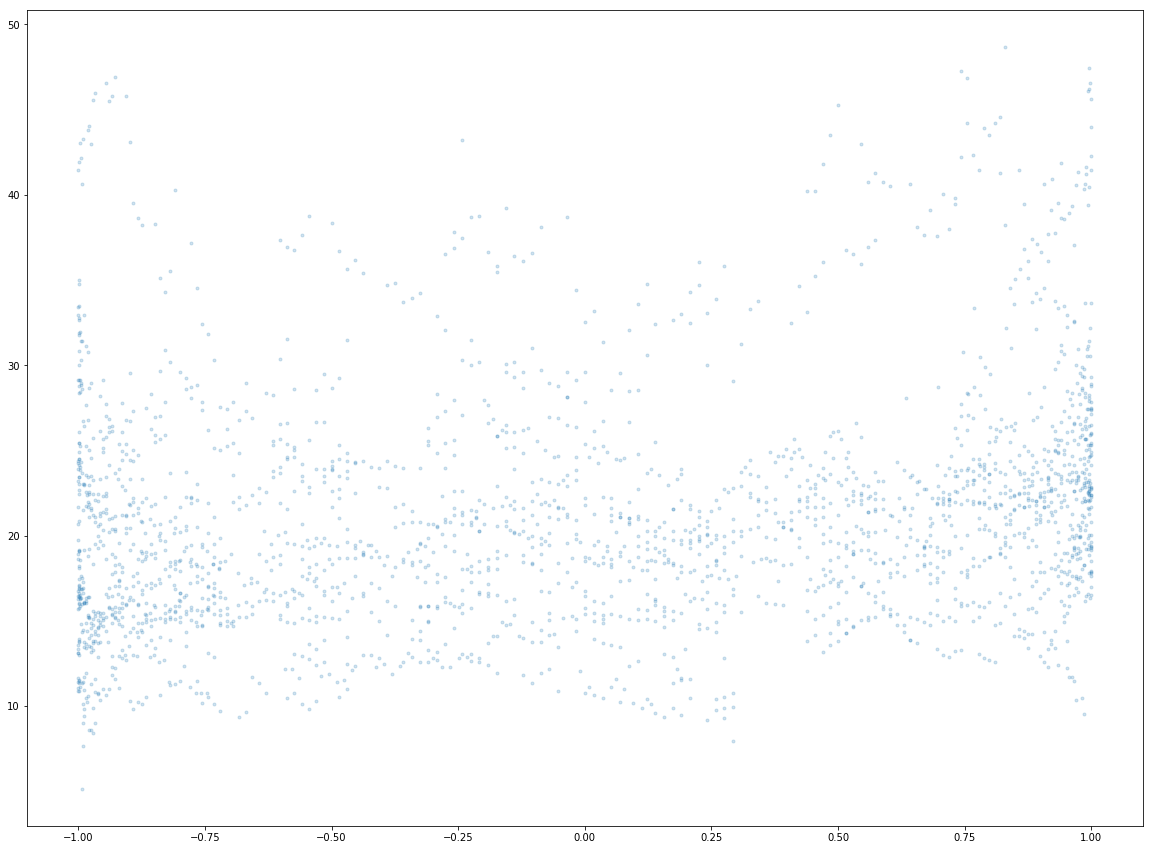

In [111]:
plt.figure(figsize=(20,15))
plt.scatter(final_data['Seasonality'], final_data['Vol'], marker='.', alpha=0.2)
#final_data.plot.scatter(x='Seasonality', y='Vol', alpha=.2, marker=',')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000086FFA20>]],
      dtype=object)

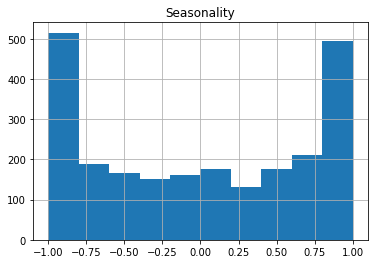

In [38]:
final_data.hist(column='Seasonality', bins=10)

C:\Users\Trader\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


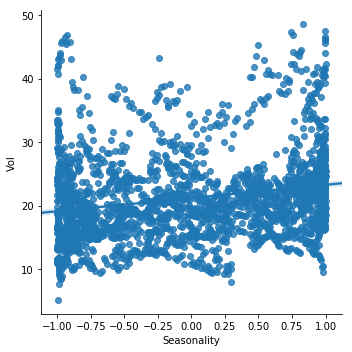

In [39]:
import seaborn as sns
sns.lmplot(x='Seasonality', y='Vol', data=final_data ,fit_reg=True)

In [40]:
np.polyfit(final_data['Seasonality'],final_data['Vol'],2)

array([ 1.95146902,  2.0869844 , 20.21526768])

In [112]:
from sklearn import linear_model
from sklearn import metrics

x = final_data['Seasonality']
y = final_data['Vol']

print(x)
print(y)

regression_model = linear_model.LinearRegression()
regression_model.fit(x, y)


15      -0.999848
32      -0.997564
49      -0.996195
66      -0.994522
83      -0.992546
100     -0.990268
117     -0.981627
134     -0.978148
151     -0.974370
168     -0.970296
185     -0.965926
202     -0.945519
219     -0.939693
236     -0.933580
253     -0.927184
270     -0.906308
287     -0.898794
304     -0.891007
321     -0.882948
338     -0.874620
355     -0.848048
372     -0.838671
389     -0.829038
406     -0.819152
423     -0.809017
440     -0.777146
457     -0.766044
474     -0.754710
491     -0.743145
508     -0.731354
           ...   
42345    0.139173
42362    0.156434
42379    0.173648
42396    0.190809
42413    0.241922
42430    0.258819
42447    0.275637
42464    0.292372
42753    0.469472
42770    0.484810
42787    0.500000
42804    0.515038
42821    0.529919
42838    0.573576
42855    0.587785
42872    0.601815
42889    0.615661
42906    0.629320
42923    0.669131
42940    0.681998
42957    0.694658
42974    0.707107
42991    0.719340
43008    0.754710
43025    0

ValueError: Expected 2D array, got 1D array instead:
array=[-0.9998477  -0.99756405 -0.9961947  ...  0.79863551  0.83867057
  0.8480481 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [57]:
x = x.values
x = x.reshape(-1,1)
print(x)

[[-0.9998477 ]
 [-0.99756405]
 [-0.9961947 ]
 ...
 [ 0.79863551]
 [ 0.83867057]
 [ 0.8480481 ]]


In [58]:
regression_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
regression_model.score(x,y)

0.046577620466850767

In [70]:
print(type(final_data.iloc[20,0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


## Converting calendar day to business day 

In [ ]:
start = dt.date(2014,1,1)
end = dt.date(2014,1,16)

days = np.busday_count(start,end)
print(days)